In [1]:
# Import dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
# Importing crime data CSV
greater_houston_df = pd.read_csv("../Resources/CSV/Crime_Index_Greater_Houston_Area_2015_2020.csv")

# Load DF
greater_houston_df.head()


,AgencyName,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total,Population,Year,County
0,BELLVILLE PD,0,3,2,6,17,45,0,73,4235,2015,Austin County
1,SEALY ISD PD,0,0,0,1,1,5,0,7,0,2015,Austin County
2,AUSTIN CO SO,0,3,2,13,48,61,8,135,17499,2015,Austin County
3,WALLIS PD,0,0,0,0,3,10,0,13,1284,2015,Austin County
4,SEALY PD,0,2,0,33,52,162,5,254,6336,2015,Austin County


In [3]:
# Rename total to total_crime
greater_houston_df.rename(columns={'Total':'Total_Crime'}, inplace=True)

In [4]:
greater_houston_df[(greater_houston_df.Total_Crime > 40000) & (greater_houston_df.Total_Crime < 60000) ]

,AgencyName,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total_Crime,Population,Year,County
83,HARRIS CO SO,89,454,3452,5214,9966,29300,6434,54909,1806761,2015,Harris County
228,HARRIS CO SO,92,537,3044,5181,9162,29962,6104,54082,1825580,2016,Harris County
375,HARRIS CO SO,92,533,2906,5463,8057,29396,5441,51888,1878832,2017,Harris County
521,HARRIS CO SO,86,591,2271,6260,7640,28113,5955,50916,1919494,2018,Harris County
662,HARRIS CO SO,97,860,2249,4123,7044,29466,6016,49855,1931639,2019,Harris County
812,HARRIS CO SO,125,1021,2078,5601,6598,30431,6851,52705,1965544,2020,Harris County


In [5]:
# Check shape
greater_houston_df.shape

(879, 12)

In [6]:
# Delete misleading data and check shape
greater_houston_df = greater_houston_df.loc[greater_houston_df["AgencyName"] != 'HARRIS CO SO']
greater_houston_df.shape

(873, 12)

In [7]:
%matplotlib inline

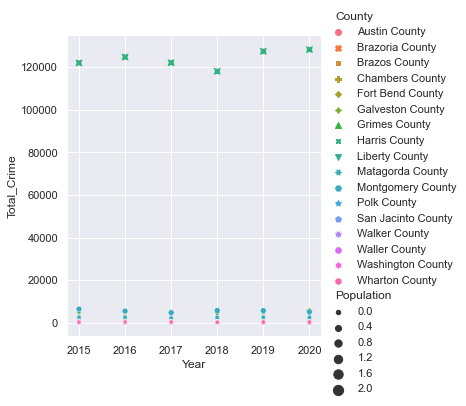

In [46]:
# Apply default sns theme
sns.set_theme(style="darkgrid")

# Crate a visualization
plot = sns.relplot(
        data = greater_houston_df,
        x = "Year", 
        y = "Total_Crime",
        hue = "County", 
        markers = True,
        style = 'County',
        size = 'Population',
        sizes = (20,120)
)

plt.savefig('Outputs/Greater_Houston_Pop_vs_Total.jpg', dpi=100)
plt.show(sns)

In [9]:
# Import new data
texas_crime_df = pd.read_csv("../Resources/CSV/texas_county_totals.csv")

# Check DF
texas_crime_df

,county,murder,rape,robbery,assault,burglary,larceny,auto theft,total,population
0,Anderson County,20,153,98,890,1511,3271,447,6390,57500
1,Andrews County,3,84,21,359,370,1491,200,2528,18508
2,Angelina County,18,237,239,1211,3702,9420,937,15764,87485
3,Aransas County,12,130,57,734,2088,4826,366,8213,32674
4,Archer County,0,7,1,31,34,95,18,186,3472
...,...,...,...,...,...,...,...,...,...,...
249,Wood County,4,137,19,281,856,1765,230,3292,45169
250,Yoakum County,0,19,0,31,131,336,40,557,8625
251,Young County,5,46,19,120,356,761,84,1391,18033
252,Zapata County,1,2,9,71,161,311,12,567,7112


In [10]:
# Make new DF 
top_5_texas = texas_crime_df[(texas_crime_df['county'] == 'Harris County') | \
                       (texas_crime_df['county'] == 'Dallas County') |
                       (texas_crime_df['county'] == 'Tarrant County') |
                       (texas_crime_df['county'] == 'Bexas County') |
                       (texas_crime_df['county'] == 'Travis County')]
top_5_texas

,county,murder,rape,robbery,assault,burglary,larceny,auto theft,total,population
56,Dallas County,1372,7895,33699,45402,95363,328655,83406,595792,2899477
100,Harris County,2536,13361,76016,123097,165783,656872,124937,1162602,4707136
219,Tarrant County,626,6607,11169,29799,51300,242547,31980,374028,2004920
226,Travis County,250,4835,6702,18067,34661,188887,18680,272082,1290144


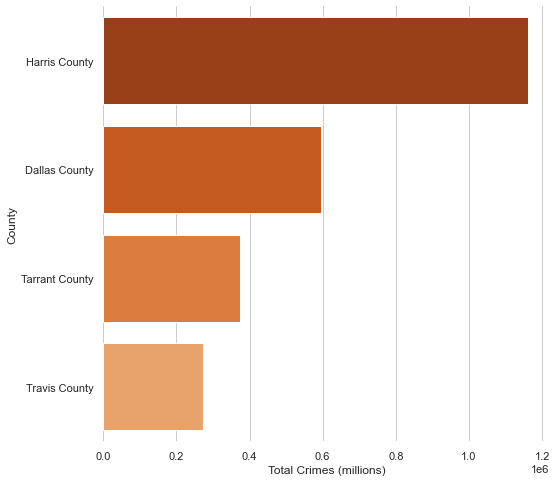

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Load the data
total = top_5_texas.sort_values("total", ascending=False)

# Plot the total crimes
sns.set_palette("Oranges_r")
sns.barplot(data=total, x="total", y="county")

# Add a legend and informative axis label
ax.set(ylabel="County", xlabel="Total Crimes (millions)")
sns.despine(left=True, bottom=True)